# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Pranay\\Projects\\GitHub\\Guided-Capstone'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [3]:
df=pd.read_csv('data/step3_output.csv')
#df.head()

In [4]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend','state','summit_elev'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
Y= df.AdultWeekend

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

In [5]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
Y = Y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=1)

In [6]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

In [7]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)
#y_pred

In [8]:
from sklearn.metrics import explained_variance_score
evs=explained_variance_score(Y_test, y_pred)
evs

0.8124586881811285

In [9]:
mbe=mean_absolute_error(Y_test, y_pred)
mbe

5.941492328505132

In [10]:
lm.intercept_

56.888279389968645

In [11]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

Coefficient
vertical_drop      3.440372e+00
trams              8.881784e-16
fastEight          1.776357e-15
fastSixes          1.332268e-15
fastQuads          6.670755e-01
quad               6.789866e-01
triple             1.140387e+00
double             5.792964e-01
surface            2.752390e-01
total_chairs       7.066122e-01
Runs               9.042044e-02
TerrainParks       6.375782e-01
LongestRun_mi      6.968007e-01
SkiableTerrain_ac  2.249795e+00
Snow Making_ac     2.068074e+00
daysOpenLastYear   1.486910e+00
yearsOpen          2.792123e-01
averageSnowfall    3.443605e+00
AdultWeekday       9.773515e+00
projectedDaysOpen  2.117846e-01
NightSkiing_ac     7.871717e-01
clusters           2.382692e+00

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [12]:
df[df['Name'].str.contains('Big Mountain')]

Name    state  summit_elev  vertical_drop  trams  \
173  Big Mountain Resort  Montana         6817           2353      0   

     fastEight  fastSixes  fastQuads  quad  triple  ...  SkiableTerrain_ac  \
173        0.0          0          3     2       6  ...             3000.0   

     Snow Making_ac  daysOpenLastYear  yearsOpen  averageSnowfall  \
173           600.0             123.0       72.0            333.0   

     AdultWeekday  AdultWeekend  projectedDaysOpen  NightSkiing_ac  clusters  
173          81.0          81.0              123.0           600.0         1  

[1 rows x 26 columns]

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [13]:
ac=df[df['Name'].str.contains('Big Mountain')]

In [14]:
X=ac.drop(['Name','AdultWeekend','state','summit_elev'], axis=1)

In [15]:
X_scaled=scaler.transform(X)


In [16]:
model.predict(X_scaled)

array([74.75062982])

In [ ]:
model.predict(X)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [17]:
print(df[df['Name'].str.contains('Big Mountain')].AdultWeekend)

173    81.0
Name: AdultWeekend, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

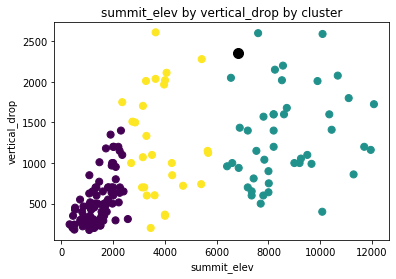

In [18]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

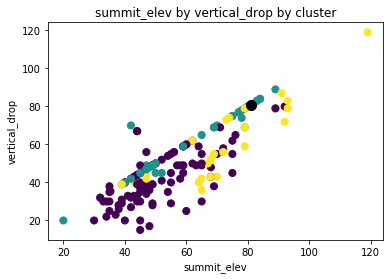

In [19]:
plt.scatter(df['AdultWeekend'], df['AdultWeekday'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['AdultWeekend'], ac['AdultWeekday'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

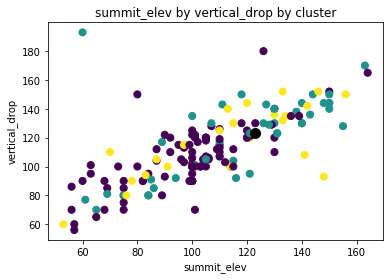

In [20]:
plt.scatter(df['daysOpenLastYear'], df['projectedDaysOpen'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['daysOpenLastYear'], ac['projectedDaysOpen'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [21]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [22]:
from sklearn import metrics

In [29]:
df.corr().abs()

summit_elev  vertical_drop  trams  fastEight  fastSixes  \
summit_elev           1.000000       0.608290    NaN        NaN        NaN   
vertical_drop         0.608290       1.000000    NaN        NaN        NaN   
trams                      NaN            NaN    NaN        NaN        NaN   
fastEight                  NaN            NaN    NaN        NaN        NaN   
fastSixes                  NaN            NaN    NaN        NaN        NaN   
fastQuads             0.156227       0.440420    NaN        NaN        NaN   
quad                  0.019733       0.003250    NaN        NaN        NaN   
triple                0.098661       0.149976    NaN        NaN        NaN   
double                0.064369       0.188041    NaN        NaN        NaN   
surface               0.368090       0.305934    NaN        NaN        NaN   
total_chairs          0.079106       0.107385    NaN        NaN        NaN   
Runs                  0.487057       0.759630    NaN        NaN        NaN   
TerrainParks          0.022849       0.119426    NaN        NaN        NaN   
LongestRun_mi         0.383749       0.664452    NaN        NaN        NaN   
SkiableTerrain_ac     0.564284       0.663569    NaN        NaN        NaN   
Snow Making_ac        0.016761       0.302954    NaN        NaN        NaN   
daysOpenLastYear      0.326688       0.304855    NaN        NaN        NaN   
yearsOpen             0.205113       0.241737    NaN        NaN        NaN   
averageSnowfall       0.693658       0.594301    NaN        NaN        NaN   
AdultWeekday          0.412575       0.642132    NaN        NaN        NaN   
AdultWeekend          0.245119       0.572197    NaN        NaN        NaN   
projectedDaysOpen     0.281628       0.290717    NaN        NaN        NaN   
NightSkiing_ac        0.129007       0.000763    NaN        NaN        NaN   
clusters              0.553617       0.577899    NaN        NaN        NaN   

                   fastQuads      quad    triple    double   surface  ...  \
summit_elev         0.156227  0.019733  0.098661  0.064369  0.368090  ...   
vertical_drop       0.440420  0.003250  0.149976  0.188041  0.305934  ...   
trams                    NaN       NaN       NaN       NaN       NaN  ...   
fastEight                NaN       NaN       NaN       NaN       NaN  ...   
fastSixes                NaN       NaN       NaN       NaN       NaN  ...   
fastQuads           1.000000  0.183104  0.261190  0.116703  0.067022  ...   
quad                0.183104  1.000000  0.188100  0.173845  0.186237  ...   
triple              0.261190  0.188100  1.000000  0.126445  0.111511  ...   
double              0.116703  0.173845  0.126445  1.000000  0.004821  ...   
surface             0.067022  0.186237  0.111511  0.004821  1.000000  ...   
total_chairs        0.479908  0.380116  0.549704  0.447191  0.618126  ...   
Runs                0.466848  0.140430  0.248108  0.261642  0.165533  ...   
TerrainParks        0.307074  0.156680  0.366571  0.279219  0.250159  ...   
LongestRun_mi       0.442499  0.003807  0.202179  0.175676  0.179178  ...   
SkiableTerrain_ac   0.371155  0.046029  0.198545  0.124832  0.174349  ...   
Snow Making_ac      0.533247  0.261716  0.415989  0.166028  0.052228  ...   
daysOpenLastYear    0.279883  0.109587  0.150444  0.118585  0.018781  ...   
yearsOpen           0.048387  0.062365  0.011446  0.194646  0.074697  ...   
averageSnowfall     0.121476  0.159470  0.039321  0.122717  0.353678  ...   
AdultWeekday        0.486826  0.163097  0.278264  0.268240  0.118024  ...   
AdultWeekend        0.469283  0.211292  0.311259  0.251969  0.069971  ...   
projectedDaysOpen   0.239883  0.064793  0.111370  0.160205  0.026935  ...   
NightSkiing_ac      0.335485  0.220404  0.391432  0.016295  0.175147  ...   
clusters            0.215264  0.041653  0.049831  0.046568  0.296880  ...   

                   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  \
summit_elev                 0.564284        0.016761          0.3266

In [34]:
#coef_dict = {}
#for coef, feat in zip(
print(list(zip(model.coef_,X_train)))
#coef_dict[feat] = coef

[(3.4403715214794794, array([-0.58371398,  0.        ,  0.        ,  0.        , -0.40789729,
       -0.77154219, -0.17474739,  0.19403179,  0.5129694 ,  0.        ,
       -0.70826631, -0.54841359,  0.52205792, -0.16574182,  1.25151064,
        0.16812489, -1.02560645, -0.41637296, -1.95114316, -0.07283367,
       -0.11534274, -0.77198267])), (8.881784197001252e-16, array([-0.64273274,  0.        ,  0.        ,  0.        , -0.40789729,
       -0.77154219, -0.95438959,  0.86926241, -0.18434838, -0.35457375,
       -0.05390345,  0.15843059, -0.66969529, -0.31838936, -0.17959756,
        0.57442672,  1.63895538, -0.88288227, -1.67274397,  0.34680405,
        0.35986572, -0.77198267])), (-1.7763568394002505e-15, array([ 1.11939889,  0.        ,  0.        ,  0.        ,  2.81819946,
        0.64159825,  0.60489481, -0.48119883,  1.21028718,  1.418295  ,
        1.96371536,  1.57211895, -0.27244422, -0.03570874,  1.60928769,
        0.98072855,  0.7975148 , -0.41637296,  1.8350859 ,  1.01

In [35]:
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

Coefficient
vertical_drop      3.440372e+00
trams              8.881784e-16
fastEight          1.776357e-15
fastSixes          1.332268e-15
fastQuads          6.670755e-01
quad               6.789866e-01
triple             1.140387e+00
double             5.792964e-01
surface            2.752390e-01
total_chairs       7.066122e-01
Runs               9.042044e-02
TerrainParks       6.375782e-01
LongestRun_mi      6.968007e-01
SkiableTerrain_ac  2.249795e+00
Snow Making_ac     2.068074e+00
daysOpenLastYear   1.486910e+00
yearsOpen          2.792123e-01
averageSnowfall    3.443605e+00
AdultWeekday       9.773515e+00
projectedDaysOpen  2.117846e-01
NightSkiing_ac     7.871717e-01
clusters           2.382692e+00

In [26]:
print(metrics.mean_absolute_error(Y_test, y_pred))

5.941492328505132
